# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import SGDRegressor , Lasso,Ridge, LinearRegression,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn import metrics 
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
train_data = pd.read_csv(r"C:\Users\HP\Downloads\train_v9rqX0R.csv")
test_data = pd.read_csv(r"C:\Users\HP\Downloads\test_AbJTz2l.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
#Checking categorical values 
for col in train_data.select_dtypes(exclude=np.number):
    print("*"*5,col,"*"*5)
    print(train_data[col].unique())
    print()

***** Item_Identifier *****
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

***** Item_Fat_Content *****
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

***** Item_Type *****
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

***** Outlet_Identifier *****
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

***** Outlet_Size *****
['Medium' nan 'High' 'Small']

***** Outlet_Location_Type *****
['Tier 1' 'Tier 3' 'Tier 2']

***** Outlet_Type *****
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [7]:
#Checking categorical values 
for col in test_data.select_dtypes(exclude=np.number):
    print("*"*5,col,"*"*5)
    print(test_data[col].unique())
    print()

***** Item_Identifier *****
['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']

***** Item_Fat_Content *****
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']

***** Item_Type *****
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']

***** Outlet_Identifier *****
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']

***** Outlet_Size *****
['Medium' nan 'Small' 'High']

***** Outlet_Location_Type *****
['Tier 1' 'Tier 2' 'Tier 3']

***** Outlet_Type *****
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']



In [8]:
train_data.Item_Fat_Content = train_data.Item_Fat_Content.apply(lambda X : X.lower())
test_data.Item_Fat_Content = test_data.Item_Fat_Content.apply(lambda X : X.lower())


In [9]:
#Replacing the lf to Low fat  ref to regular 

train_data["Item_Fat_Content"].replace("low fat","lf",inplace =True)
train_data["Item_Fat_Content"].replace("regular","reg",inplace=True)

test_data["Item_Fat_Content"].replace("low fat","lf",inplace =True)
test_data["Item_Fat_Content"].replace("regular","reg",inplace=True)


In [10]:
#checking whether it replaced or not
train_data.Item_Fat_Content.unique()

array(['lf', 'reg'], dtype=object)

In [11]:
# droping two categorical variables ie item_identifer and Oulet_identifier
train_data.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)
test_data.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace= True)


In [12]:
# checking the values of numeric volumns

In [13]:
"""for col in train_data.select_dtypes(exclude="object"):
    print("*"*5,col,"*"*5)
    print(list(train_data[col].unique()))
    print()"""

'for col in train_data.select_dtypes(exclude="object"):\n    print("*"*5,col,"*"*5)\n    print(list(train_data[col].unique()))\n    print()'

# checking and treating missing values

In [14]:
def missing_values(train_data,test_data,target):
    if train_data[target].isnull().any():
        train_data.dropna(subset=target,inplace=True)
    pe_train = train_data.isnull().sum() / len(train_data)*100
    pe_test  =test_data.isnull().sum() / len(test_data)*100
    print("*"*10,"percentage of missing values of trai and test","*"*10)
    print()
    print(pe_train,'\n',pe_test)
    for col in train_data.drop(columns="Item_Outlet_Sales"):
        if pe_train[col] >30:
            train_data.drop(columns=[col],inplace=True)
            test_data.drop(columns=[col],inplace=True)
        elif train_data[col].dtype != 'object' and pe_train[col] <30:
            median = train_data[col].median()
            train_data[col] = train_data[col].fillna(median)
            test_data[col] = train_data[col].fillna(median)
        else :
            mode = train_data[col].mode()[0]
            train_data[col] = train_data[col].fillna(mode)
            test_data[col] = train_data[col].fillna(mode)

missing_values(train_data,test_data,"Item_Outlet_Sales")
print()
print()
print()

print("checking wether the function is working properly or not")
per_train = train_data.isnull().sum() / len(train_data)*100
per_test  = test_data.isnull().sum()/len(test_data)*100
print(per_train,'\n\n\n\n',per_test)
            
        
        
    

********** percentage of missing values of trai and test **********

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 
 Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64



checking wether the function is working properly or not
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0


# Checking outliers

In [15]:
def plot(col):
    sns.boxplot(train_data[col])
    plt.show()

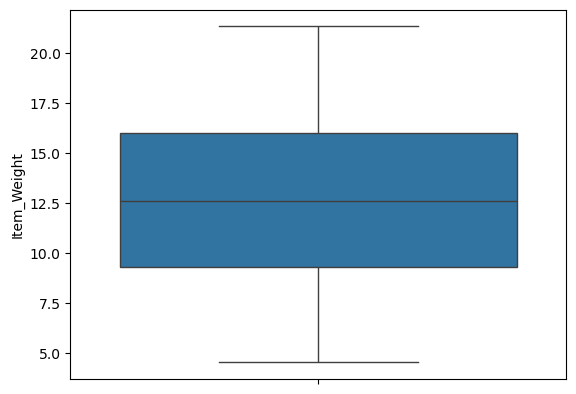

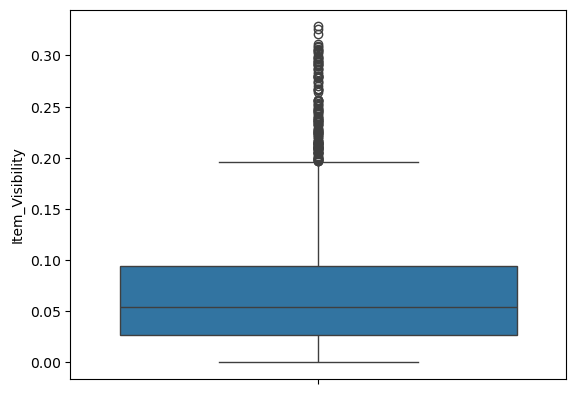

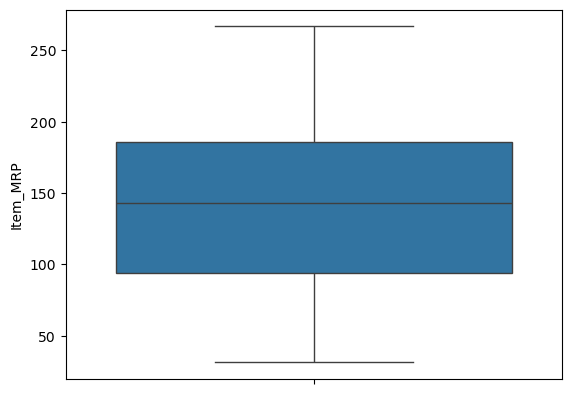

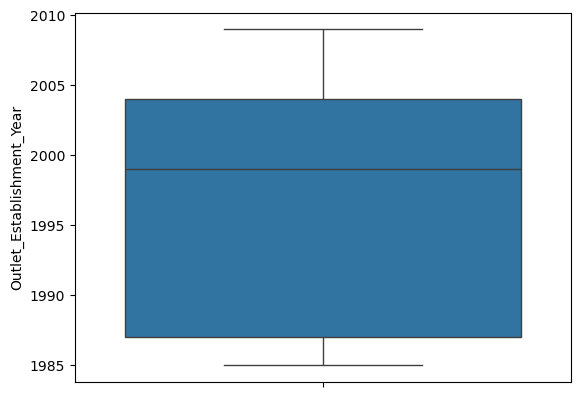

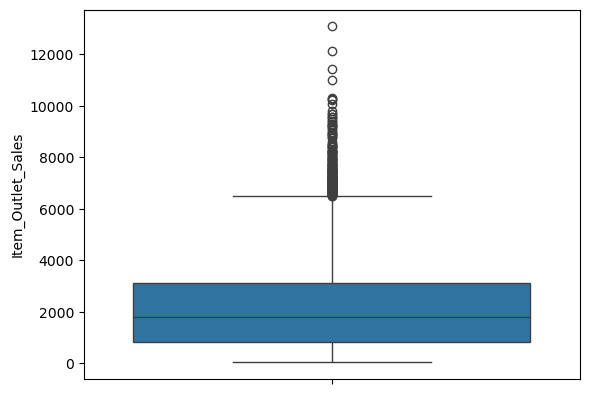

In [16]:
for col in train_data.select_dtypes(exclude='object'):
    plot(col)

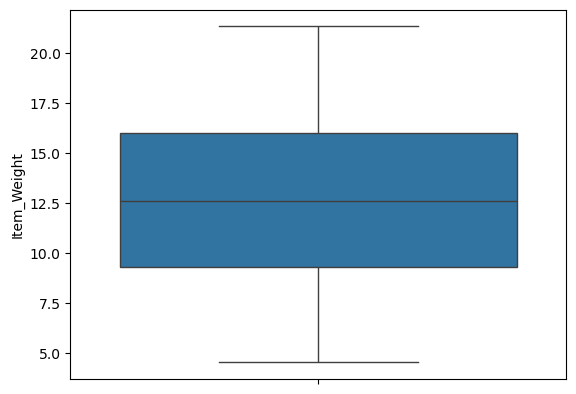

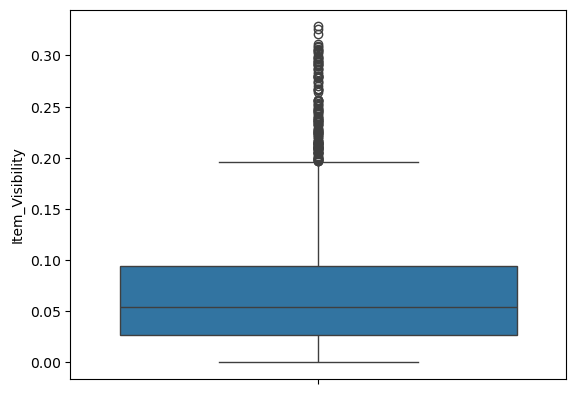

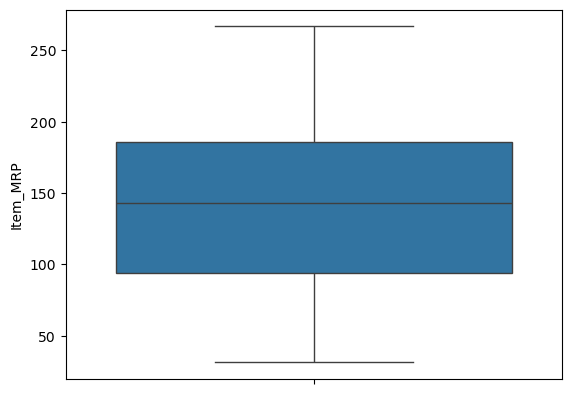

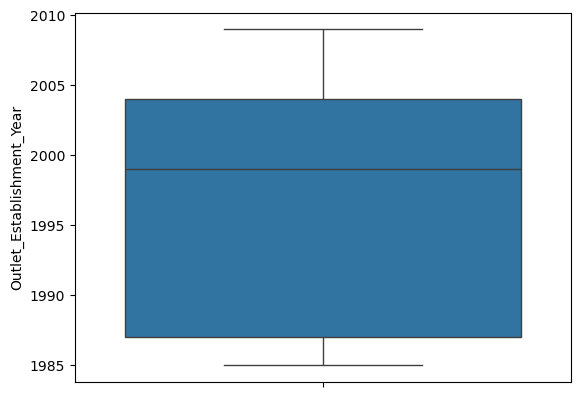

In [17]:
for i in test_data.select_dtypes(exclude="object"):
    plot(i)

In [18]:
# I will treat later after checking model scores

# Encoding

In [19]:
train_data.select_dtypes(exclude=np.number).columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [20]:
print(train_data["Item_Fat_Content"].unique())
test_data["Item_Fat_Content"].unique()


['lf' 'reg']


array(['lf', 'reg'], dtype=object)

In [21]:
print(train_data["Item_Fat_Content"].value_counts())
test_data["Item_Fat_Content"].value_counts()


Item_Fat_Content
lf     5517
reg    3006
Name: count, dtype: int64


Item_Fat_Content
lf     3677
reg    2004
Name: count, dtype: int64

In [22]:

train_data["Item_Fat_Content"]=train_data["Item_Fat_Content"].astype('category').cat.codes
test_data["Item_Fat_Content"]=test_data["Item_Fat_Content"].astype('category').cat.codes


In [23]:
train_data["Outlet_Location_Type"]=train_data["Outlet_Location_Type"].apply(lambda x: int(x[-1]))
test_data["Outlet_Location_Type"]=test_data["Outlet_Location_Type"].apply(lambda x : int(x[-1]))


In [24]:
train_data["Outlet_Size"]=train_data["Outlet_Size"].astype('category').cat.codes
test_data["Outlet_Size"]=test_data["Outlet_Size"].astype('category').cat.codes


In [25]:
train_data = pd.get_dummies(train_data,dtype = int , drop_first=True)
test_data = pd.get_dummies(test_data,dtype = int , drop_first=True)


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int8   
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      8523 non-null   int8   
 6   Outlet_Location_Type             8523 non-null   int64  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Item_Type_Breads                 8523 non-null   int32  
 9   Item_Type_Breakfast              8523 non-null   int32  
 10  Item_Type_Canned                 8523 non-null   int32  
 11  Item_Type_Dairy                  8523 non-null   int32  
 12  Item_Type_Frozen Foo

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Fat_Content                 5681 non-null   int8   
 2   Item_Visibility                  5681 non-null   float64
 3   Item_MRP                         5681 non-null   float64
 4   Outlet_Establishment_Year        5681 non-null   int64  
 5   Outlet_Size                      5681 non-null   int8   
 6   Outlet_Location_Type             5681 non-null   int64  
 7   Item_Type_Breads                 5681 non-null   int32  
 8   Item_Type_Breakfast              5681 non-null   int32  
 9   Item_Type_Canned                 5681 non-null   int32  
 10  Item_Type_Dairy                  5681 non-null   int32  
 11  Item_Type_Frozen Foods           5681 non-null   int32  
 12  Item_Type_Fruits and

# separating independent and dependent variables

In [28]:
X= train_data.drop(columns="Item_Outlet_Sales")

In [29]:
y= train_data["Item_Outlet_Sales"]

# scalling

In [30]:
sc = StandardScaler()
X_scal =pd.DataFrame(sc.fit_transform(X),columns=X.columns)
test_data_scal = pd.DataFrame(sc.transform(test_data),columns=X.columns)

In [31]:
X_scal.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.831187,-0.738147,-0.970732,1.747454,0.139541,-0.284581,-1.369334,-0.174193,-0.114346,-0.287094,...,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,0.726802,-0.349551,-0.351028
1,-1.630810,1.354743,-0.908111,-1.489023,1.334103,-0.284581,1.091569,-0.174193,-0.114346,-0.287094,...,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,4.260611,-0.132935,-1.375891,2.860816,-0.351028
2,1.108727,-0.738147,-0.956917,0.010040,0.139541,-0.284581,-1.369334,-0.174193,-0.114346,-0.287094,...,-0.345735,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,0.726802,-0.349551,-0.351028
3,1.510904,1.354743,-1.281758,0.660050,0.020085,-0.284581,1.091569,-0.174193,-0.114346,-0.287094,...,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-1.375891,-0.349551,-0.351028
4,-0.918719,-0.738147,-1.281758,-1.399220,-1.293934,-1.950437,1.091569,-0.174193,-0.114346,-0.287094,...,2.892392,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,0.726802,-0.349551,-0.351028


In [32]:
test_data_scal.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.831187,-0.738147,-0.970732,1.747454,0.139541,-0.284581,-1.369334,-0.174193,-0.114346,-0.287094,...,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,0.726802,-0.349551,-0.351028
1,-1.630810,1.354743,-0.908111,-1.489023,1.334103,-0.284581,1.091569,-0.174193,-0.114346,-0.287094,...,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,4.260611,-0.132935,-1.375891,2.860816,-0.351028
2,1.108727,-0.738147,-0.956917,0.010040,0.139541,-0.284581,-1.369334,-0.174193,-0.114346,-0.287094,...,-0.345735,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,0.726802,-0.349551,-0.351028
3,1.510904,1.354743,-1.281758,0.660050,0.020085,-0.284581,1.091569,-0.174193,-0.114346,-0.287094,...,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-1.375891,-0.349551,-0.351028
4,-0.918719,-0.738147,-1.281758,-1.399220,-1.293934,-1.950437,1.091569,-0.174193,-0.114346,-0.287094,...,2.892392,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,0.726802,-0.349551,-0.351028


# Train and test split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [34]:
#this function returns the score all 8 algo and choosing the best among them

def scores(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
    
    models = dict(zip('DecisionTree RandomForest HistGradientboosting  GradientBoosting Xgboost lr SVR'.split(),
                      
                      [DecisionTreeRegressor(),RandomForestRegressor(),HistGradientBoostingRegressor(),
                      GradientBoostingRegressor(),
                       XGBRegressor(),LinearRegression()
                      ])
                 )
    algo_scores = pd.DataFrame()
    algo_scores['model_name']=list(models.keys())
    train_score = []
    test_score = []
    for _,estimator in models.items():
        estimator.fit(X_train,y_train)
        
        y_train_preds=estimator.predict(X_train)
        
        y_test_preds=estimator.predict(X_test)
        train_r2 = metrics.r2_score(y_train,y_train_preds)
        test_r2 = metrics.r2_score(y_test,y_test_preds)
        train_score.append(float(f'{train_r2:.2f}'))
        test_score.append(float(f'{test_r2:.2f}'))
    algo_scores["Train_scores"]=train_score
    algo_scores["Test_scores"]=test_score
    algo_scores.sort_values(by='Test_scores',ascending=False,inplace=True)
     
    return algo_scores
        
    
    
performances= scores(X,y)





In [35]:
performances

,model_name,Train_scores,Test_scores
3,GradientBoosting,0.63,0.59
2,HistGradientboosting,0.72,0.58
5,lr,0.56,0.56
1,RandomForest,0.94,0.54
4,Xgboost,0.87,0.51
0,DecisionTree,1.00,0.16


In [36]:
performances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 3 to 0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_name    6 non-null      object 
 1   Train_scores  6 non-null      float64
 2   Test_scores   6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes


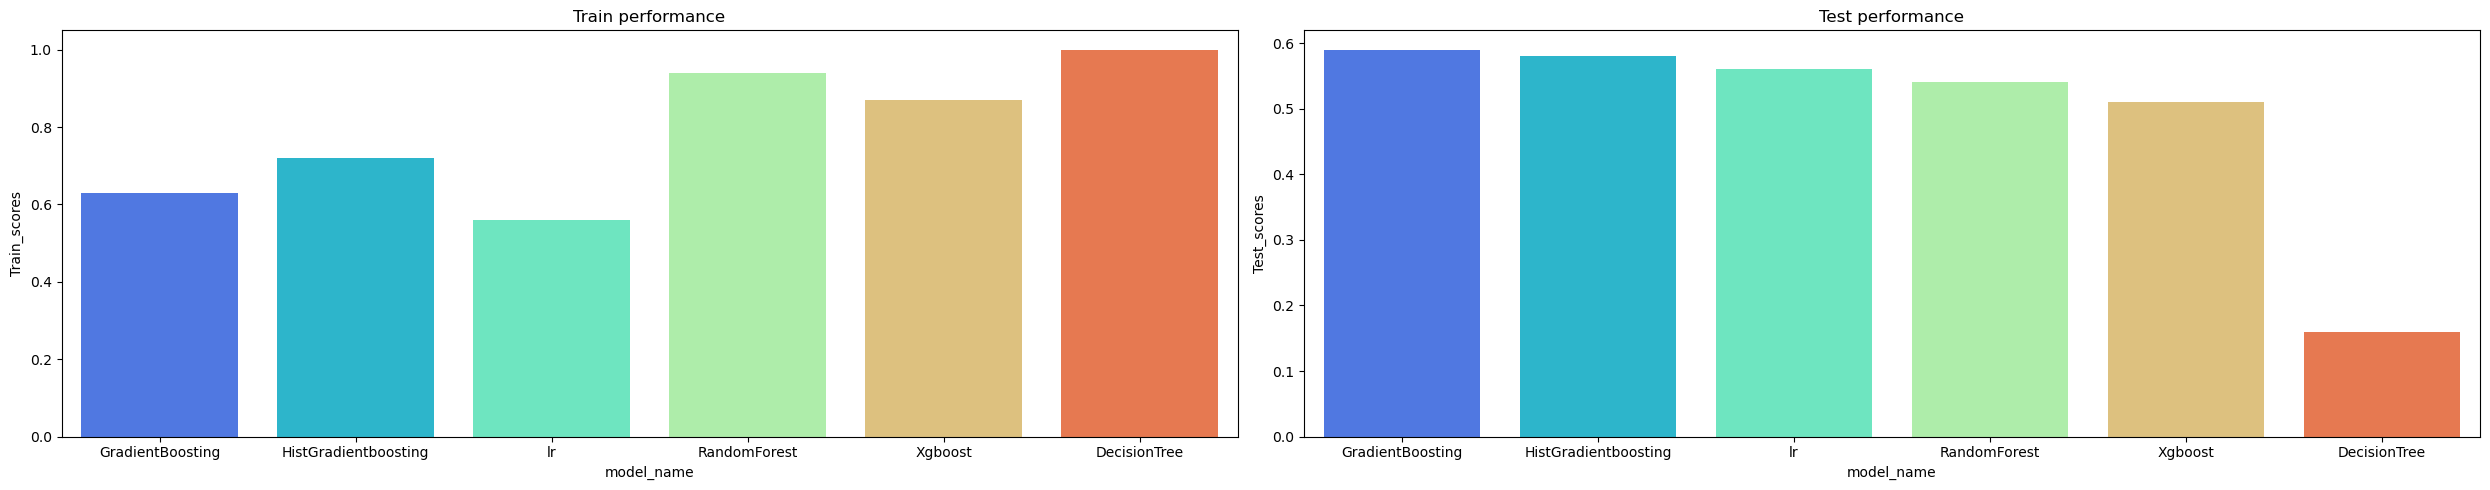

In [37]:
plt.figure(figsize=(25,5))
plt.subplot(121)
sns.barplot(y='Train_scores',x='model_name',palette='rainbow',data = performances)
plt.title('Train performance')
plt.subplot(122)
sns.barplot(y='Test_scores',x='model_name',palette='rainbow',data = performances)
plt.title('Test performance')
plt.tight_layout()

# Hyper parameter tuning

**Xgboost**

In [38]:
Xgboost = XGBRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
grid_search = GridSearchCV(estimator=Xgboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [41]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (negative MSE):", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score (R^2):", test_score)
best_model.score(X_train,y_train)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score (negative MSE): -1206719.732346137
Test Score (R^2): 0.5911989351957685


0.6259648057817789

In [42]:
best_model.predict(test_data)

array([4021.2922 ,  642.92865, 2180.8142 , ..., 2574.964  , 2682.7236 ,
       2460.5706 ], dtype=float32)

**Gradient boosting**

In [43]:
GboostR = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}


In [44]:
grid_search_gradient = GridSearchCV(estimator=GboostR,param_grid=param_grid,cv=5,scoring="neg_mean_squared_error",n_jobs=-1)

In [45]:
grid_search_gradient.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [46]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score (negative MSE):", grid_search.best_score_)

# Use the best model to predict
best_model1 = grid_search_gradient.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score (R^2):", test_score)
best_model.score(X_train,y_train)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score (negative MSE): -1206719.732346137
Test Score (R^2): 0.5911989351957685


0.6259648057817789

**Random Forest**

In [47]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [48]:
grid_search_rf = GridSearchCV(estimator=GboostR,param_grid=param_grid,cv=5,scoring="neg_mean_squared_error",n_jobs=-1)

In [49]:
grid_search_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [53]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score (negative MSE):", grid_search.best_score_)

# Use the best model to predict
best_modelrf = grid_search_rf.best_estimator_
test_score = best_modelrf.score(X_test, y_test)
print("Test Score (R^2):", test_score)
best_model.score(X_train,y_train)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score (negative MSE): -1206719.732346137
Test Score (R^2): 0.5384536417837051


0.6259648057817789

In [80]:
from sklearn.ensemble import StackingRegressor,VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

stack_model = StackingRegressor(estimators=[('xgboost',best_model),('gradient',best_model1),('rf',best_modelrf)],final_estimator=Ridge())
stack_model.fit(X_train,y_train)


StackingRegressor(estimators=[('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('gradient',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=4,
                                                         min_samples_split=5,
                                                         n_estimators=300)),
                              ('rf',
                               GradientBoostingRegressor(max_depth=10,
                                                         max_features='sqrt',
                                                         min_samples_leaf=4,
                                                         min_samples_split=5))],
                  final_estimator=Ridge())

In [81]:
train_preds = stack_model.predict(X_train)
test_preds = stack_model.predict(X_test)
train_score = metrics.r2_score(y_train,train_preds)
test_score = metrics.r2_score(y_test,test_preds)


In [82]:
train_score,test_score

(0.6267533904647381, 0.595635312589843)

In [84]:
test_data["Item_Outlet_Sales"] = stack_model.predict(test_data)

In [87]:
test_data.to_csv('output.csv',index=False)

In [86]:
import pickle 
pickle.dump(best_model,open('sales.pk1','wb'))

In [89]:
model = pickle.load(open('sales.pk1','rb'))